# 01. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'C:\Users\carol\Documents\DA\02 Data Inmersion\06 Advanced Analytics & Dashboard Design\Olist Analysis'

In [4]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'items_final_all.csv'), index_col = False)

In [5]:
# Check dataset

df.head()

,Unnamed: 0,order_id,order_item_count,product_id,seller_id,shipping_limit_date,item_price,item_shipping_cost,product_name_length,product_description_length,...,review_id,review_score,review_title,review_text,survey_sent_date,survey_submision_date,order_product_item_count,order_product,order_lead_time,order_days_delayed
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,58,598,...,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,00010242fe8c5a6d1ba2dd792cb16214_4244733e06e7e...,00010242fe8c5a6d1ba2dd792cb16214_4244733e06e7e...,7.614421,-8.011250
1,1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,58,598,...,b11cba360bbe71410c291b764753d37f,5,NaN,"lannister como sempre, entregou certinho e den...",2017-07-14 00:00:00,2017-07-17 12:50:07,130898c0987d1801452a8ed92a670612_4244733e06e7e...,130898c0987d1801452a8ed92a670612_4244733e06e7e...,15.366076,-12.139248
2,2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,58,598,...,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12,532ed5e14e24ae1f0d735b91524b98b9_4244733e06e7e...,532ed5e14e24ae1f0d735b91524b98b9_4244733e06e7e...,17.339271,-2.226088
3,3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,58,598,...,8304ff37d8b16b57086fa283fe0c44f8,5,NaN,NaN,2017-08-10 00:00:00,2017-08-13 03:35:17,6f8c31653edb8c83e1a739408b5ff750_4244733e06e7e...,6f8c31653edb8c83e1a739408b5ff750_4244733e06e7e...,8.116563,-15.106563
4,4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,58,598,...,426f43a82185969503fb3c86241a9535,5,NaN,NaN,2017-08-25 00:00:00,2017-08-28 00:51:18,7d19f4ef4d04461989632411b7e588b9_4244733e06e7e...,7d19f4ef4d04461989632411b7e588b9_4244733e06e7e...,13.927558,-7.163646


# 02. Create new table with product characteristics

In [6]:
# Create new table with product characteristics

df_product = df.groupby(['product_id']).agg({'item_price': ['mean'],'item_shipping_cost': ['mean'],'product_weight_g': ['mean'],'product_length_cm': ['mean'],'product_height_cm': ['mean'],'product_width_cm': ['mean']})

In [7]:
df_product.head()

,item_price,item_shipping_cost,product_weight_g,product_length_cm,product_height_cm,product_width_cm
,mean,mean,mean,mean,mean,mean
product_id,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,101.65,18.59,300.0,20.0,16.0,16.0
00088930e925c41fd95ebfe695fd2655,129.90,13.93,1225.0,55.0,10.0,26.0
0009406fd7479715e4bef61dd91f2462,229.00,13.10,300.0,45.0,15.0,35.0
000b8f95fcb9e0096488278317764d19,58.90,19.60,550.0,19.0,24.0,12.0
000d9be29b5207b54e86aa1b1ac54872,199.00,19.27,250.0,22.0,11.0,15.0


In [8]:
# Export new dataset

df_product.to_csv(os.path.join(path, '02 Data','Prepared Data', 'products.csv'))

In [9]:
# Import data

df_product = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'products.csv'), index_col = False)

In [10]:
# Check dataset

df_product.head()

,Unnamed: 0,item_price,item_shipping_cost,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,NaN,mean,mean,mean,mean,mean,mean
1,product_id,NaN,NaN,NaN,NaN,NaN,NaN
2,00066f42aeeb9f3007548bb9d3f33c38,101.65,18.59,300.0,20.0,16.0,16.0
3,00088930e925c41fd95ebfe695fd2655,129.9,13.93,1225.0,55.0,10.0,26.0
4,0009406fd7479715e4bef61dd91f2462,229.0,13.1,300.0,45.0,15.0,35.0


In [11]:
# Rename column

df_product.rename(columns = {'Unnamed: 0' : 'product_id'}, inplace = True)

In [12]:
# Drop rows

df_product = df_product.drop([0, 1])

In [13]:
# Drop and reset index

df_product.reset_index(drop=True)

,product_id,item_price,item_shipping_cost,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00066f42aeeb9f3007548bb9d3f33c38,101.65,18.59,300.0,20.0,16.0,16.0
1,00088930e925c41fd95ebfe695fd2655,129.9,13.93,1225.0,55.0,10.0,26.0
2,0009406fd7479715e4bef61dd91f2462,229.0,13.1,300.0,45.0,15.0,35.0
3,000b8f95fcb9e0096488278317764d19,58.9,19.6,550.0,19.0,24.0,12.0
4,000d9be29b5207b54e86aa1b1ac54872,199.0,19.27,250.0,22.0,11.0,15.0
...,...,...,...,...,...,...,...
32179,fff6177642830a9a94a0f2cba5e476d1,114.99,27.705,1400.0,42.0,25.0,15.0
32180,fff81cc3158d2725c0655ab9ba0f712c,90.0,7.89,58.0,16.0,16.0,11.0
32181,fff9553ac224cec9d15d49f5a263411f,32.0,11.85,150.0,16.0,13.0,11.0
32182,fffdb2d0ec8d6a61f0a0a0db3f25b441,33.989999999999995,11.774,150.0,16.0,4.0,13.0


In [14]:
# Export new dataset

df_product.to_csv(os.path.join(path, '02 Data','Prepared Data', 'products_final.csv'))

In [15]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'products_final.csv'), index_col = False)

# 03. Data wrangling

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32184 entries, 0 to 32183
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          32184 non-null  int64  
 1   product_id          32184 non-null  object 
 2   item_price          32184 non-null  float64
 3   item_shipping_cost  32184 non-null  float64
 4   product_weight_g    32183 non-null  float64
 5   product_length_cm   32183 non-null  float64
 6   product_height_cm   32183 non-null  float64
 7   product_width_cm    32183 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.0+ MB


In [17]:
# Drop columns

df = df.drop(columns = ['Unnamed: 0'])

# 04.Data cleaning

In [18]:
df.columns

Index(['product_id', 'item_price', 'item_shipping_cost', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [19]:
df.shape

(32184, 7)

## Missing values

In [20]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

product_id            0
item_price            0
item_shipping_cost    0
product_weight_g      1
product_length_cm     1
product_height_cm     1
product_width_cm      1
dtype: int64

In [21]:
# Drop row with missing value

df = df.dropna()

## Duplicates check

In [22]:
dups = df.duplicated()

In [23]:
dups.shape # No dups

(32183,)

## Extreme values checks

C:\Users\carol\AppData\Local\Temp\ipykernel_12716\2025888454.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['product_weight_g'], bins=25) # Shows extreme values


<Axes: xlabel='product_weight_g', ylabel='Density'>

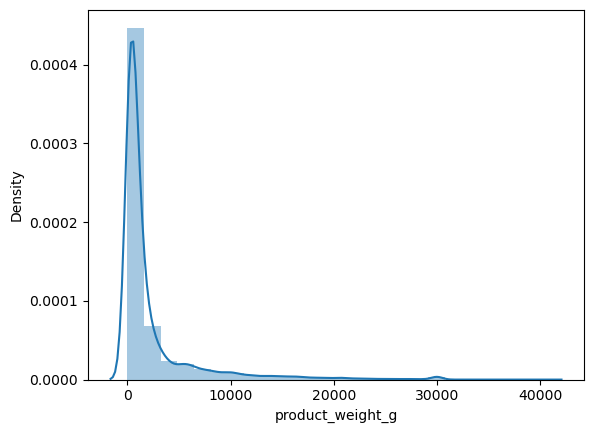

In [24]:
sns.distplot(df['product_weight_g'], bins=25) # Shows extreme values

# no outliers

In [25]:
df['product_weight_g'].mean() # Check the mean

2276.839231892614

In [26]:
df['product_weight_g'].median() # Check the median

700.0

In [27]:
df['product_weight_g'].max() # Check the max

40425.0

# 05. Data prep for regression analysis

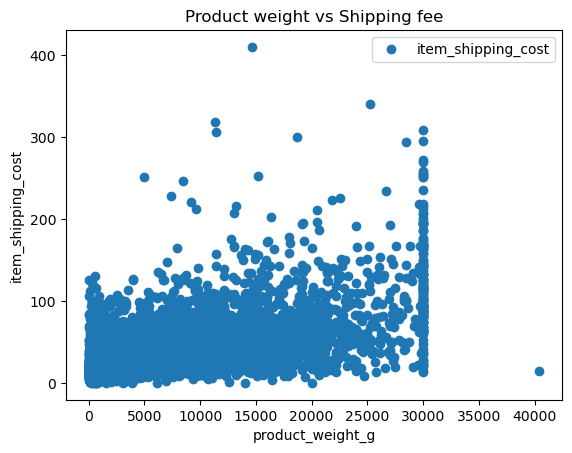

In [28]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'product_weight_g', y='item_shipping_cost',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Product weight vs Shipping fee')  
plt.xlabel('product_weight_g')  
plt.ylabel('item_shipping_cost')  
plt.show()

In [29]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['product_weight_g'].values.reshape(-1,1)
y = df['item_shipping_cost'].values.reshape(-1,1)

In [30]:
X

array([[ 300.],
       [1225.],
       [ 300.],
       ...,
       [ 150.],
       [ 150.],
       [3900.]])

In [31]:
y

array([[18.59 ],
       [13.93 ],
       [13.1  ],
       ...,
       [11.85 ],
       [11.774],
       [53.88 ]])

In [32]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 06. Regression analysis

## Hypothesis: The heavier the product, the higher the shipping cost

In [33]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [34]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

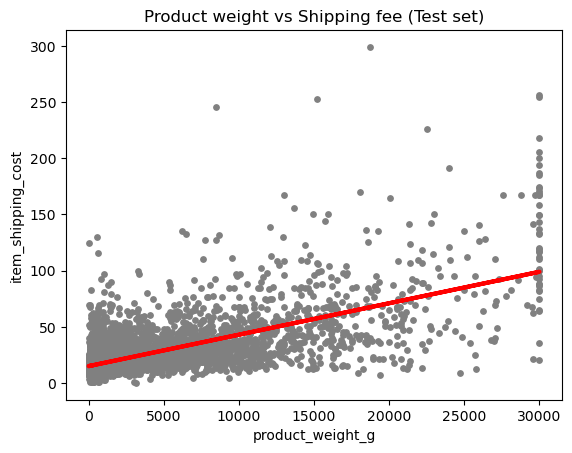

In [36]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Product weight vs Shipping fee (Test set)')
plot_test.xlabel('product_weight_g')
plot_test.ylabel('item_shipping_cost')
plot_test.show()

### The linear model represented by the red regression line doesn’t perfectly cover all of the data points. For instance, the heaviest products have both high and low shipping costs.

In [37]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [38]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00279981]]
Mean squared error:  167.88250761640958
R2 score:  0.4766030108019996


### Slope: the slope shows there's a weak positive relationship between vairables. The slope here means as the weight increases, the cost of shipping slightly increases at a degree of 0.0027.
### MSE: the root mean squared error is large, indicating that the data points are far away from the regression line.  It’s safe to say that a regression may not be the best model to represent this data and can’t accurately predict the influence of product weight on the shipping cost.
### R2 score: the 47% score indicates that the model is not a great fit.

In [39]:
y_predicted

array([[15.17759226],
       [15.17759226],
       [16.85747753],
       ...,
       [16.71748709],
       [31.27649281],
       [15.52756836]])

In [40]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,14.520000,15.177592
1,14.240000,15.177592
2,8.470000,16.857478
3,16.730000,16.017535
4,22.860000,18.117391
5,16.406667,15.247587
6,9.270000,18.537363
7,23.280000,16.308715
8,28.470000,17.697420
9,10.760000,16.997468


### There’s a big difference between the actual and predicted y values. This just adds evidence to the fact that the model isn’t doing a great job of explaining the relationship between the “Product Weight” and “Shipping Cost” variables. The relationship simply doesn’t follow a single, straight regression line 

## Compare how the regression fits the training set

In [41]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [42]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [43]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00279981]]
Mean squared error:  190.19928083164507
R2 score:  0.4256650889356617


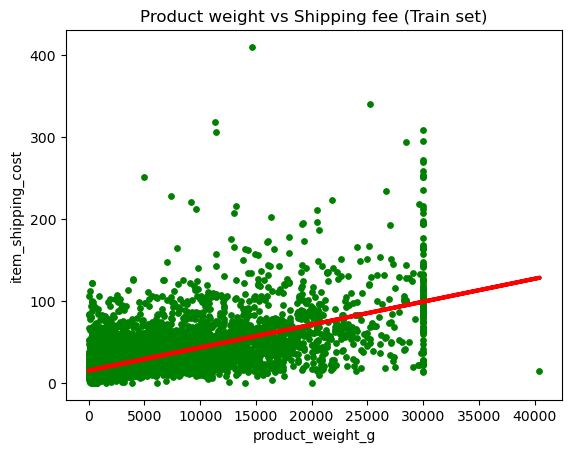

In [44]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Product weight vs Shipping fee (Train set)')
plot_test.xlabel('product_weight_g')
plot_test.ylabel('item_shipping_cost')
plot_test.show()